# Importación de bibliotecas necesarias

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import nbformat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

import math
from sklearn.metrics import r2_score, mean_squared_error

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore')

# Lectura del CSV

In [4]:
cars_data = pd.read_csv('C:/Users/juan8/OneDrive/Escritorio/Trabajo_2_ciencia/EDA_Juan_Esteban_Ochoa/data.csv')

NameError: name 'pd' is not defined

In [43]:
cars_data.head(5) # Para mostrar las 5 primeras filas

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [44]:
cars_data.info() # Nos da una visión general de la estructura y los tipos de datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [45]:
cars_data.describe()  # nos proporciona estadísticas descriptivas de las columnas numéricas.

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# Estadisticas descriptivas

- Año: el año mínimo en el conjunto de datos es 1990, el año promedio es 2010 y el año máximo es 2017.

- Cabezales del motor: los caballos de fuerza mínimos en el conjunto de datos son 55, los caballos de fuerza promedio son 249 y los caballos de fuerza máximos son 1001.

- Cilindros del motor: los cilindros mínimos en el conjunto de datos son 0, los cilindros promedio son 5 y los cilindros máximos son 16.

- Número de puertas: el mínimo de puertas que tiene un automóvil es 2, en promedio, el número de puertas es 3 y el máximo es 4.

- Millas por galón en carretera: el mínimo de millas por galón en carretera en el conjunto de datos es 12, el promedio de millas por galón en carretera es 26,6 y el máximo de millas por galón en carretera es 354.

- Millas por galón en ciudad: el mínimo de millas por galón en ciudad en el conjunto de datos es 7, el promedio de millas por galón en ciudad es 19,7 y el máximo de millas por galón en ciudad es 137.

- Popularidad: la popularidad mínima de un automóvil en el conjunto de datos es 2, la popularidad promedio de los autos es 1554,9 y la popularidad máxima de los autos es 5657.

- Precio: el precio mínimo de un auto en el conjunto de datos es 2000, el precio promedio de un auto es 40 000 y el precio máximo de un auto es 2,06 millones.

# limpieza de datos

Se modificaran los nombres de las columnas de manera mas resumida. Para mejorar el manejo y visualización del conjunto de datos.


In [46]:
cars_data.columns = cars_data.columns.str.lower().str.replace(" ", "_")
cars_data.rename(columns = {'engine_fuel_type' : 'fuel_type', 'engine_hp' : 'hp', 'engine_cylinders' : 'cylinders', 'transmission_type' : 'transmission', 'driven_wheels' : 'drive', 'number_of_doors' : 'doors', 'market_category' : 'market', 'vehicle_size' : 'size', 'vehicle_style' : 'style', 'msrp' : 'price'}, inplace = True)

In [54]:
print('Number of missing values in each columns are below : ')
print(cars_data.isnull().sum())

Number of missing values in each columns are below : 
make               0
model              0
year               0
fuel_type          0
hp                 0
cylinders          0
transmission       0
drive              0
doors              0
market          3726
size               0
style              0
highway_mpg        0
city_mpg           0
popularity         0
price              0
dtype: int64


Descartemos la columna de mercado, ya que contiene demasiados valores nulos y, además, esta característica no tiene mucha importancia con respecto a la característica objetivo, que es el precio.

In [55]:
cars_data.drop('market', axis = 1, inplace = True)

Ahora se comprobara qué columnas del conjunto de datos tienen valores nulos.

In [56]:
null_values = cars_data[cars_data.isnull().any(axis = 1)]
null_values

,make,model,year,fuel_type,hp,cylinders,transmission,drive,doors,size,style,highway_mpg,city_mpg,popularity,price


El tipo de combustible, los caballos de fuerza, los cilindros y también las puertas tienen valores nulos.

- Se rellenaran los valores nulos en el tipo de combustible con el modo, ya que esta columna es categórica.

- Los caballos de fuerza se rellenarán con 0, ya que los coches que tienen valores nulos son coches eléctricos. Por lo tanto, no tienen caballos de fuerza en general.

- Sabemos que los coches eléctricos no tienen cilindros, por lo que los valores nulos se rellenarán nuevamente con 0.

- Está bien rellenar los valores nulos en las puertas con la media, ya que es una columna numérica.

In [47]:
cars_data['fuel_type'] = cars_data['fuel_type'].fillna('regular unleaded')

cars_data['hp'] = cars_data['hp'].fillna(0)

cars_data['cylinders'] = cars_data['cylinders'].fillna(0)

cars_data['doors'] = cars_data['doors'].fillna(cars_data['doors'].mean())

Ahora vamos a separar las columnas numéricas y categóricas para usarlas más adelante.

In [48]:
num_col = cars_data.select_dtypes(include = [np.number])
cat_col = cars_data.select_dtypes(exclude = [np.number])

Mostrar los valores únicos de cada columna para ver si los datos dentro de las columnas están bien o no. En resumen, este paso se llevará a cabo para detectar anomalías.

In [49]:
for col in cat_col:
    print(col)
    print(cars_data[col].unique())
    print(cars_data[col].nunique())
    print('\n', "======================================", '\n')

make
['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']
48


model
['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500e' '500' '500L' '500X' '550' '560-Class' '570S' '575M'
 '57' '599' '5' '6 Series Gran Coupe' '6 Series' '600-Class' '6000'
 '612 Scaglietti

Las columnas de transmisión tienen un valor "DESCONOCIDO", lo que claramente es una anomalía. Por lo tanto, descartaré todos los autos cuya transmisión sea DESCONOCIDA.

In [50]:
cars_data.drop(cars_data[cars_data['transmission']=='UNKNOWN'].index, axis='index', inplace = True)

# Valores atipicos

Un valor atípico es un punto o un conjunto de puntos que son diferentes de otros puntos. A veces pueden ser muy altos o muy bajos. Suele ser una buena idea detectar y eliminar los valores atípicos, ya que son una de las principales razones por las que el modelo resulta menos preciso.

In [51]:
import plotly.io as pio
pio.renderers.default = "browser"  

for i in num_col:
    fig = px.box(cars_data, x=cars_data[i])
    fig.update_traces(fillcolor='#FF0000')
    fig.show()

Según los resultados tenemos que: 

- Potencia del motor: La potencia mínima en el conjunto de datos después de la eliminación de valores atípicos es 0, la potencia media es 231 y la potencia máxima es 485.

- Cilindros del motor: La potencia mínima en el conjunto de datos después de la eliminación de valores atípicos es 3, la potencia media es 5 y la potencia máxima es 8.

- Millas por galón en carretera: La potencia mínima en carretera en el conjunto de datos después de la eliminación de valores atípicos es 12, la potencia media en carretera es 26,3 y la potencia máxima en carretera es 42.

- Millas por galón en ciudad: La potencia mínima en ciudad en el conjunto de datos después de la eliminación de valores atípicos es 10, la potencia media en ciudad es 19,1 y la potencia máxima en ciudad es 31.

- Precio: El precio mínimo del coche en el conjunto de datos después de la eliminación de valores atípicos es 2000, el precio medio del coche es de alrededor de 29.000 y el precio máximo del coche es de 70.900.

Un valor atípico es un punto o un conjunto de puntos que son diferentes de otros puntos. A veces pueden ser muy altos o muy bajos. Suele ser una buena idea detectar y eliminar los valores atípicos, ya que son una de las principales razones por las que el modelo resulta menos preciso, por lo que es una buena idea eliminarlos.

Como parte de la limpieza de datos procederemos a borras estos datos.

In [3]:
s1 = cars_data.shape
clean = cars_data[['hp', 'cylinders', 'highway_mpg', 'city_mpg', 'price']]
for i in clean.columns:
    qt1 = cars_data[i].quantile(0.25)
    qt3 = cars_data[i].quantile(0.75)
    iqr =  qt3 - qt1
    lower = qt1-(1.5*iqr)
    upper = qt3+(1.5*iqr)
    min_in = cars_data[cars_data[i]<lower].index
    max_in = cars_data[cars_data[i]>upper].index
    cars_data.drop(min_in, inplace = True)
    cars_data.drop(max_in, inplace = True)
s2 = cars_data.shape
outliers = s1[0] - s2[0]
print("Deleted outliers are : ", outliers)

NameError: name 'cars_data' is not defined

# Analisis de datos

In [52]:
for i in cars_data:
    fig = px.histogram(cars_data, x= i, color_discrete_sequence = ['#FF0000'])
    fig.show()

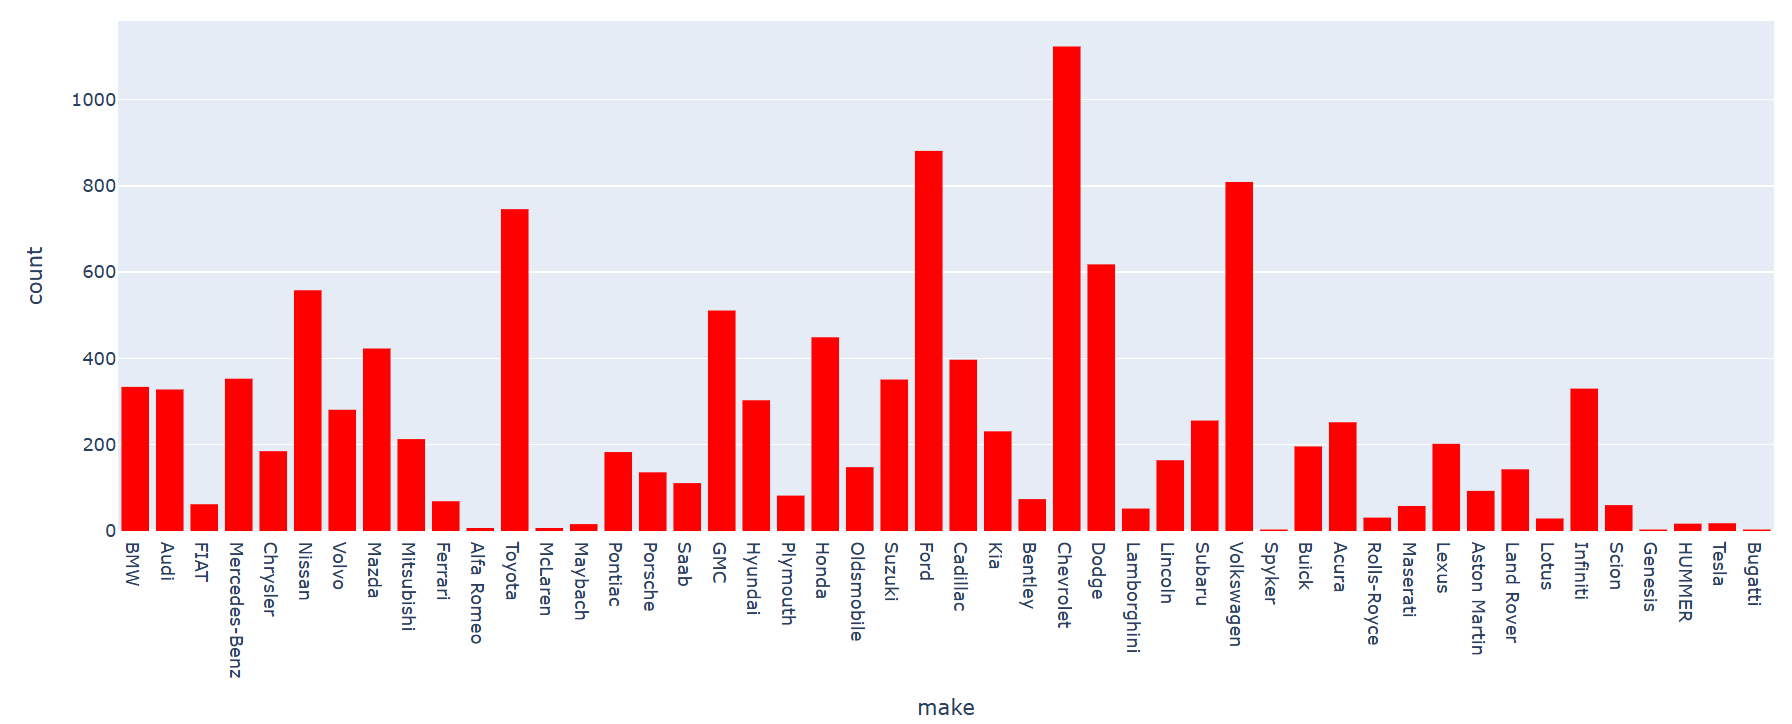

Observando la gráfica, se destacan las siguientes conclusiones:

# Marcas más frecuentes

Las marcas Toyota, Chevrolet y Dodge son las más comunes en el conjunto de datos, con las barras más altas, superando las 800 y 1000 unidades respectivamente. Esto sugiere que estas marcas tienen una mayor representación en los datos y podrían influir en los análisis, especialmente en el desarrollo de modelos predictivos del precio.

# Marcas de frecuencia moderada

Marcas como Nissan, GMC, Ford, y Volkswagen también tienen una representación considerable, aunque menor que las anteriores. Estas marcas están entre las 400 y 600 unidades, indicando que también son populares, pero no tanto como Toyota o Chevrolet.

# Marcas menos frecuentes

Algunas marcas de lujo o de nicho, como Maybach, Bugatti, McLaren, Rolls-Royce y Lotus, tienen muy pocos registros en el conjunto de datos, con menos de 100 unidades cada una. Esto refleja su menor presencia en el mercado general, probablemente debido a su exclusividad y precios más altos.

# Posibles sesgos

La representación desigual de las marcas sugiere un sesgo en el conjunto de datos hacia los fabricantes de automóviles más populares en el mercado general. Esto podría afectar los resultados de cualquier modelo predictivo, ya que la escasez de datos para marcas menos frecuentes podría hacer que el modelo tenga un rendimiento limitado al predecir precios para estas.

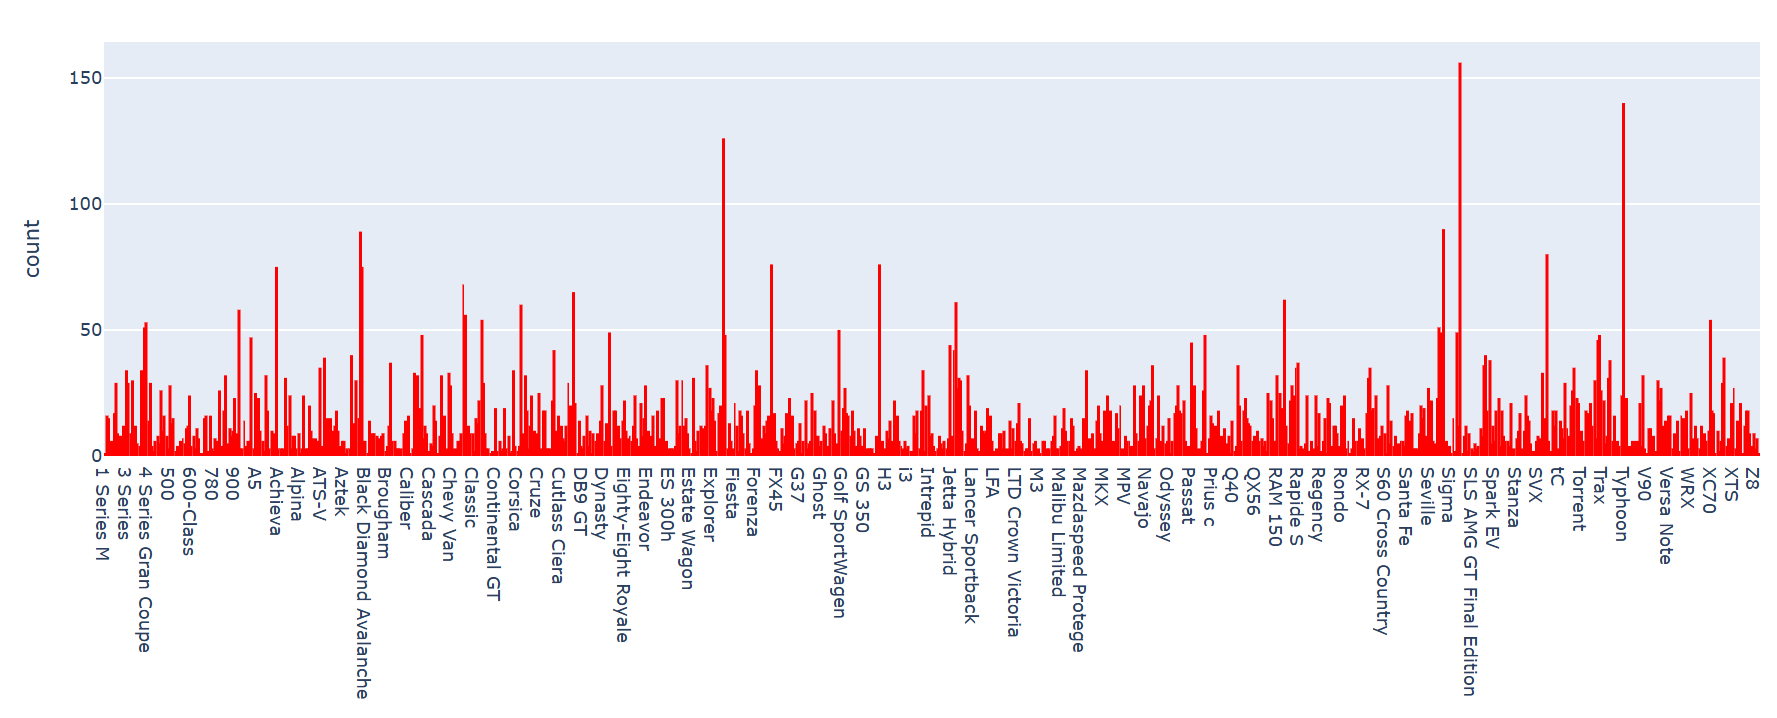

# Modelos más frecuentes

Se observa que algunos modelos específicos, como "Fiesta," "Explorer," "SLS AMG GT Final Edition," y "Typhoon," tienen una representación más alta en comparación con otros, superando los 100 registros. Estos modelos destacan por su popularidad en el conjunto de datos, lo cual sugiere una  gran popularidad en el mercado o un uso extendido en los datos.


# Modelos de frecuencia moderada

Hay una gran cantidad de modelos con frecuencias en el rango de 20 a 50 registros. Esto incluye una variedad de nombres que probablemente abarcan modelos populares pero que no alcanzan los niveles de frecuencia de los mencionados en el punto anterior. Estos modelos muestran una distribución intermedia, reflejando cierta representación sin llegar a ser los más comunes.

# Modelos menos frecuentes

La gráfica muestra una gran cantidad de modelos con menos de 20 registros, y muchos incluso tienen menos de 10. Estos modelos pueden incluir versiones especiales, autos de lujo, o modelos antiguos que no tienen una alta representación en el conjunto de datos. La baja frecuencia podría deberse a su rareza o a que son menos comunes en el mercado.

# Distribución desigual

La alta variabilidad en la cantidad de registros por modelo sugiere que el conjunto de datos está sesgado hacia algunos modelos populares, mientras que otros modelos tienen una representación limitada. Esto es importante a considerar para cualquier análisis o modelado predictivo, ya que la falta de datos sobre modelos menos comunes podría llevar a resultados menos precisos para estos.

# Posibles implicaciones para el análisis

 Dado que ciertos modelos tienen una representación muy alta, mientras que otros son escasos, el modelo predictivo que intentes desarrollar podría tener un rendimiento desigual. Sería recomendable considerar técnicas de balanceo o ajuste en el análisis para compensar esta variabilidad y evitar sesgos que puedan sobrestimar la influencia de los modelos más comunes.

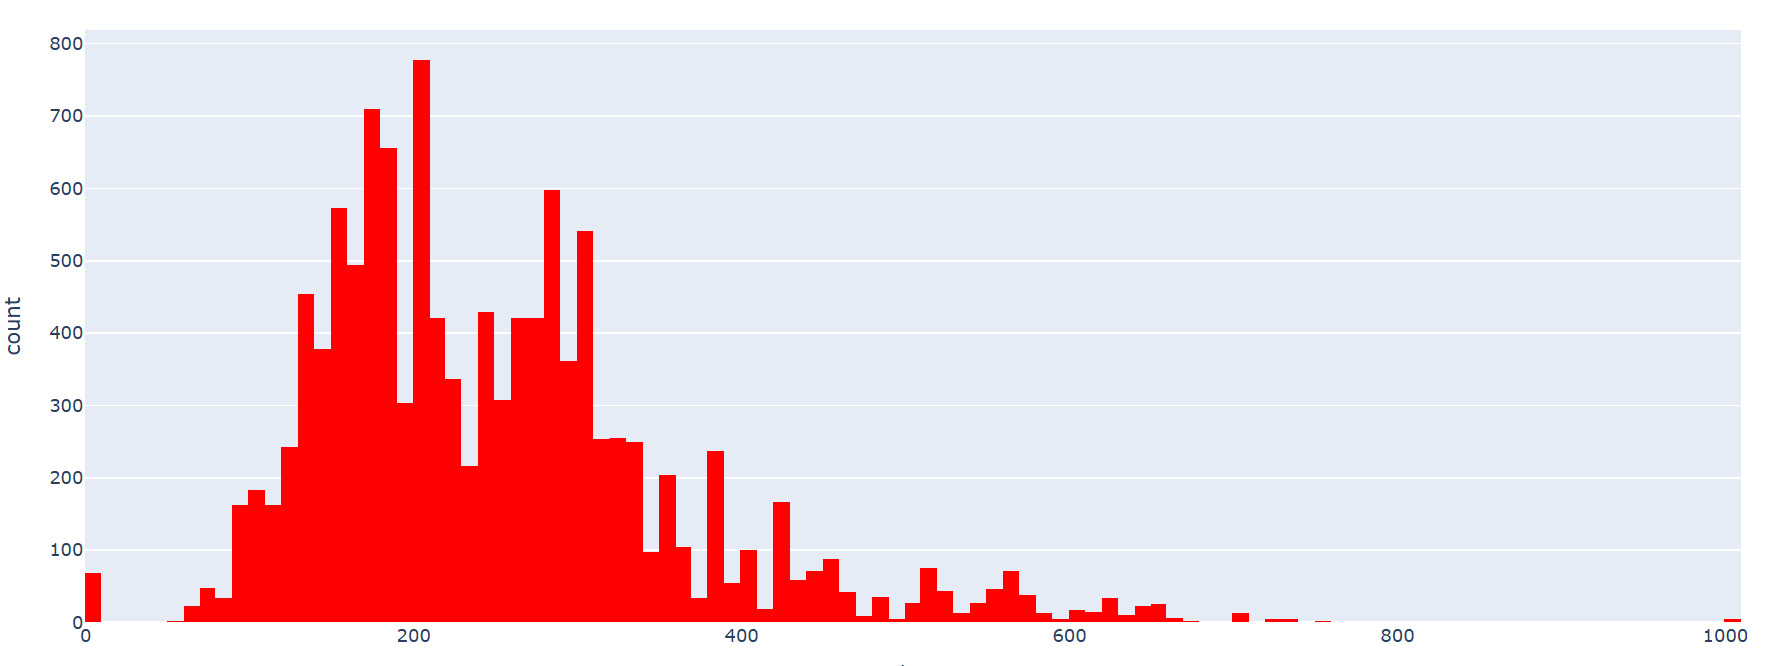

La gráfica muestra una distribución asimétrica, sesgada a la derecha. Esto significa que la mayoría de los automóviles tienen una potencia que se concentra en valores bajos y medianos (principalmente entre 100 y 400 HP), mientras que hay una cantidad mucho menor de automóviles con potencias más altas. Este tipo de distribución es típica en el mercado automotriz, donde la mayoría de los vehículos son de potencia baja a media, y los vehículos de alta potencia son menos comunes.

# Bajo rango de potencia (alrededor de 150 a 200 HP)

 Este rango probablemente corresponde a vehículos de uso común, como autos compactos y algunos sedanes, que suelen tener motores de menor potencia orientados a la eficiencia.

# Rango medio de potencia (alrededor de 200 a 400 HP)

 Esta es la categoría con la mayor concentración de datos. Es posible que incluya sedanes de mayor rendimiento, SUVs y algunos deportivos de entrada. La popularidad en este rango puede estar vinculada a automóviles que equilibran eficiencia y desempeño.

# Rango alto de potencia (más de 400 HP)

Aquí las frecuencias bajan considerablemente. Este grupo podría incluir autos deportivos, de lujo y vehículos especializados como camionetas de alto rendimiento, que son menos comunes debido a su mayor costo y consumo de combustible.

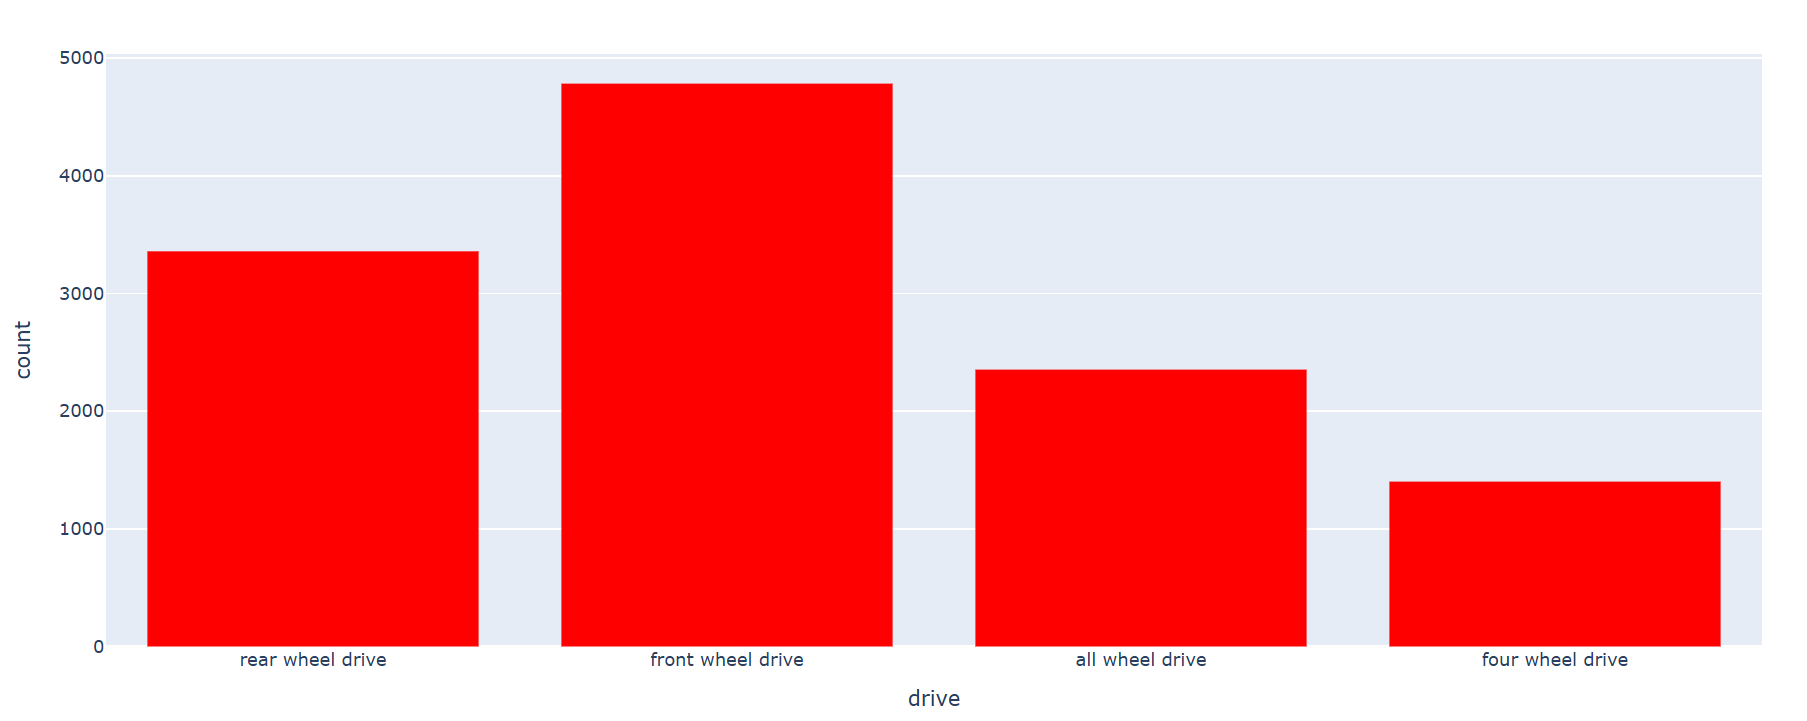

El eje *X* epresenta las diferentes configuraciones de tracción disponibles en los automóviles:

- Rear Wheel Drive (RWD): Tracción trasera.
- Front Wheel Drive (FWD): Tracción delantera.
- All Wheel Drive (AWD): Tracción total o integral.
- Four Wheel Drive (4WD): Tracción en las cuatro ruedas, típicamente utilizada en condiciones off-road.

# Tracción delantera (FWD)  

Es la configuración más común en el conjunto de datos, con más de 4500 automóviles. Esto es coherente con la industria automotriz, ya que la tracción delantera es popular en vehículos compactos y sedanes debido a su eficiencia y menor costo de fabricación.

# Tracción trasera (RWD)

 La segunda configuración más común, con alrededor de 3000 automóviles. Este tipo de tracción es típico en vehículos deportivos, de lujo y camionetas debido a su mejor manejo en condiciones de alto rendimiento.

# Tracción total (AWD)

 Representa una cantidad considerable pero menor, con aproximadamente 2000 automóviles. Este tipo de tracción es común en SUVs, crossovers y algunos sedanes de alta gama, dado su enfoque en la estabilidad y el desempeño en diferentes terrenos.

# Tracción en las cuatro ruedas (4WD)

Es la menos común, con menos de 1500 automóviles. Este sistema es característico de vehículos diseñados para actividades off-road, como camionetas y vehículos todoterreno.

Los datos nos dan 3 *conclusiones* importantes: 

- La preponderancia de la tracción delantera (FWD) y la tracción trasera (RWD) sugiere que el conjunto de datos está compuesto principalmente por vehículos diseñados para uso urbano y en carreteras pavimentadas.

- La menor proporción de vehículos con tracción total (AWD) y tracción en las cuatro ruedas (4WD) indica que los vehículos orientados a terrenos más desafiantes o condiciones climáticas adversas constituyen una minoría en el mercado representado.

- Esta distribución refleja tendencias típicas de los mercados automotrices, donde los vehículos FWD dominan debido a su accesibilidad, mientras que las opciones AWD y 4WD son más específicas para ciertos nichos.

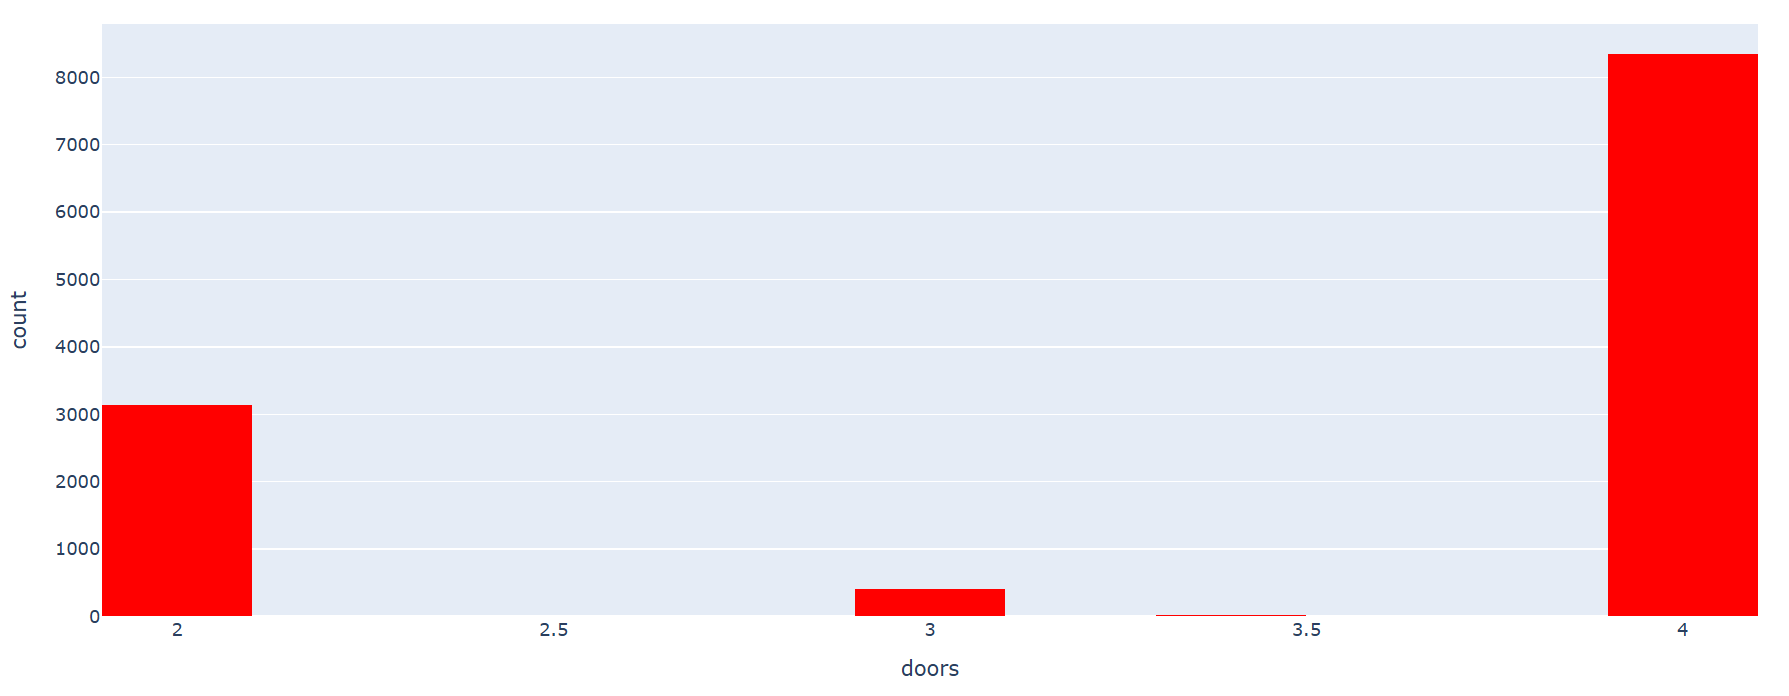

En esta grafica se puede hacer un analisis sencillo en el cual se determina que la preferencia en el mercado esta muy inclinada hacia los vehiculos que cuentan con 4 puertas. 

Con menor proporción, pero tambien con predominancia en el mercado tenemos a los vehiculos con 2 puertas.


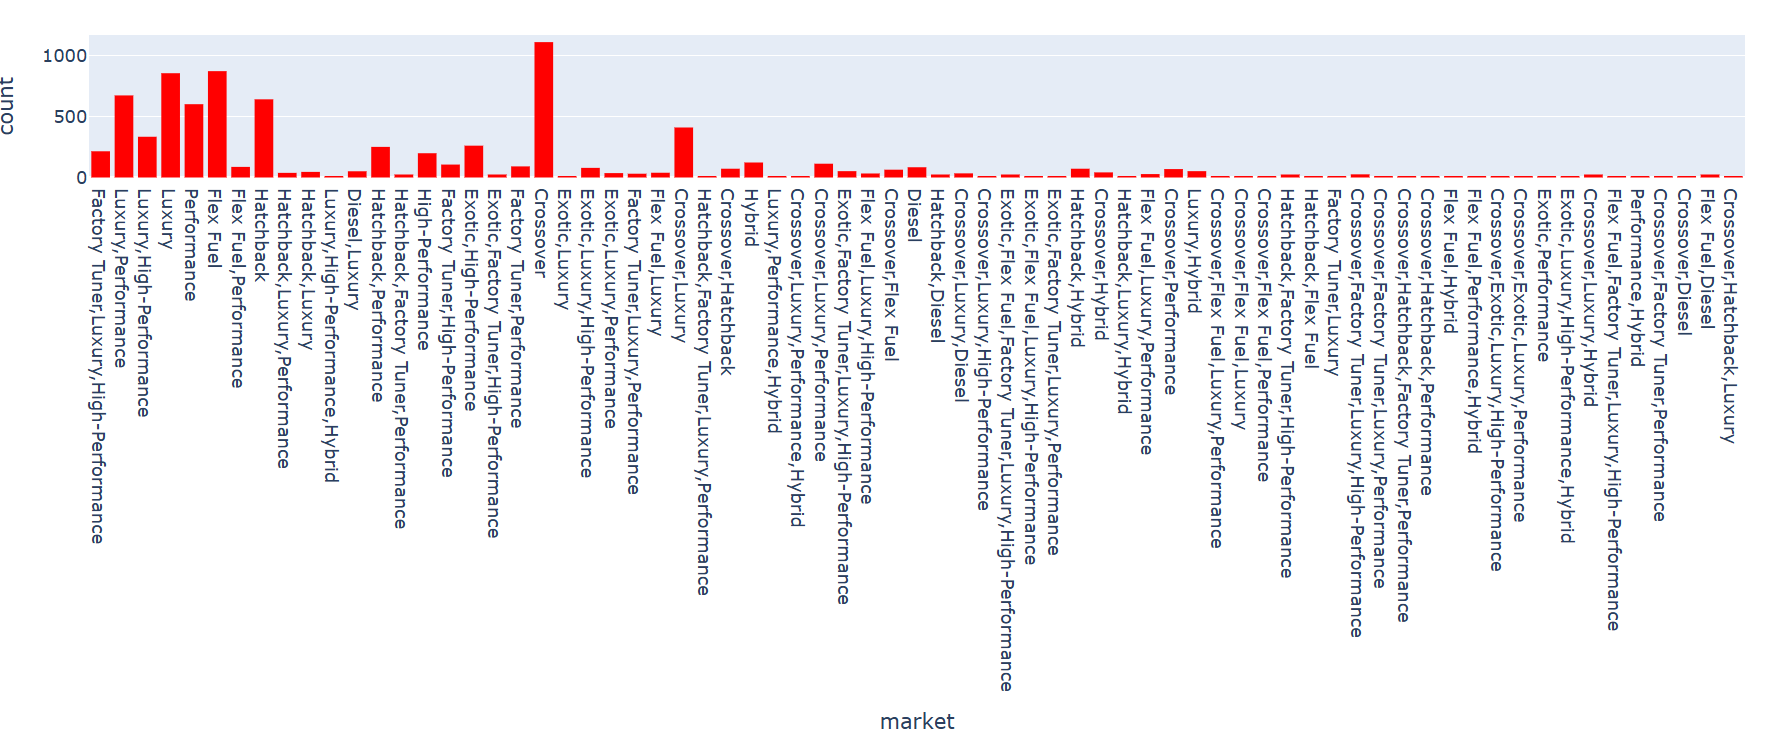

Se observa una clara concentración de datos en ciertas combinaciones de características. Algunas combinaciones, como aquellas que incluyen "crossover", "luxury" y "performance", aparecen con mucha más frecuencia que otras. Lo que sugiere que estos atributos son altamente correlacionados y que ciertos tipos de vehículos son mucho más comunes en el conjunto de datos que otros.

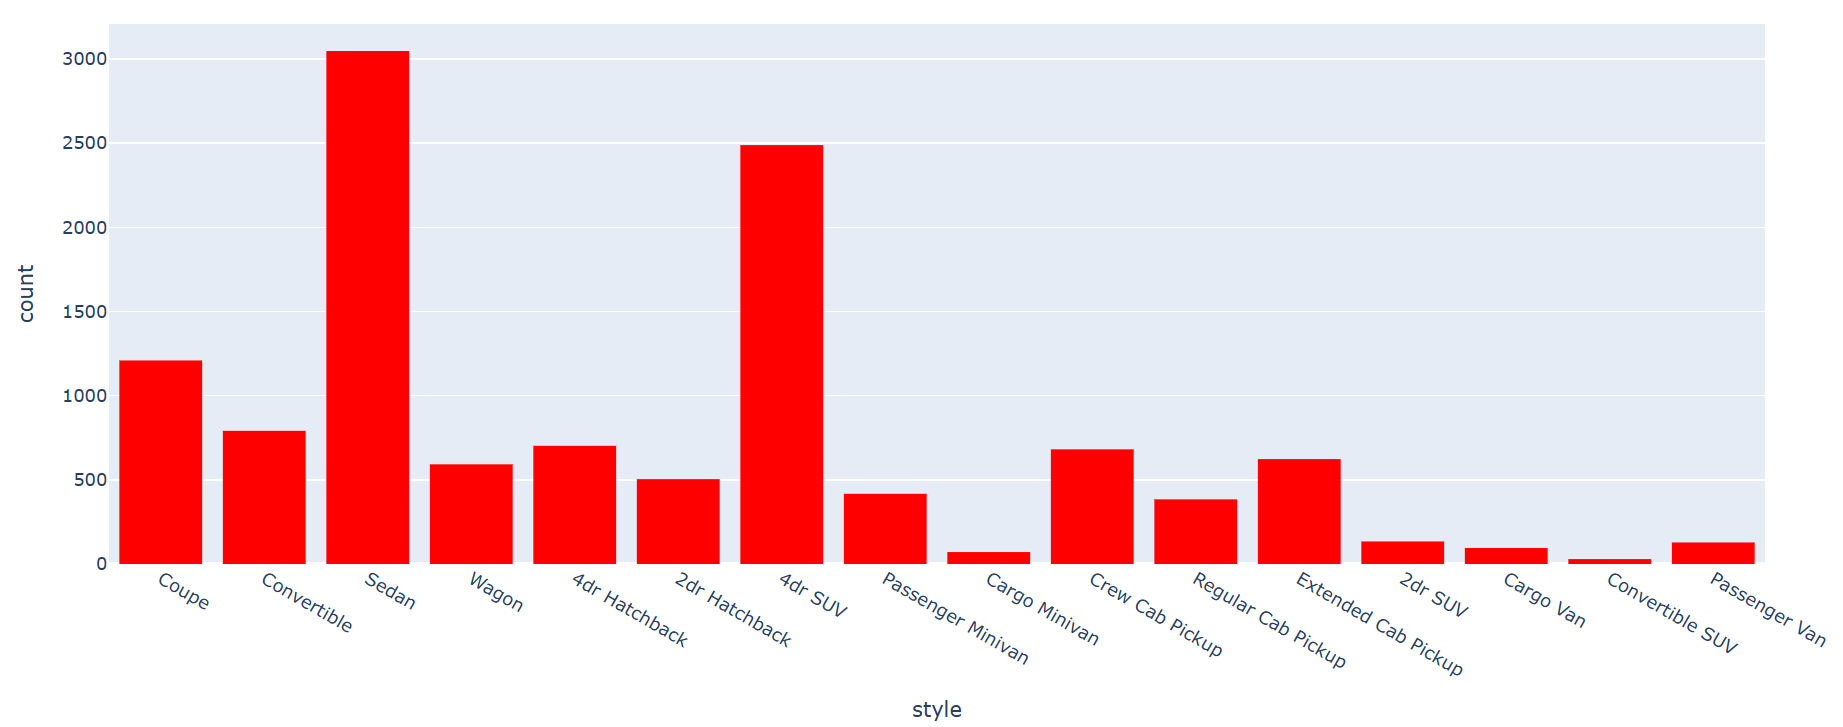

# Modelo mas frecuente

El estilo de automóvil más frecuente en tu conjunto de datos es el sedán. Esto sugiere que tu muestra tiene una buena representación de este tipo de vehículo, lo cual es común en muchos conjuntos de datos de automóviles, ya que los sedanes son uno de los tipos de carrocería más populares.

# Modelo con frecuencia moderada

Los SUV (vehículos utilitarios deportivos) también tienen una presencia significativa. Su popularidad ha aumentado en los últimos años, y esta gráfica lo confirma.

# Modelos menos frecuentes

Se observa una buena variedad de estilos de automóviles, lo que indica que tu conjunto de datos es bastante representativo del mercado automotriz en general. Sin embargo, hay estilos menos frecuentes como los convertibles y las camionetas de carga.

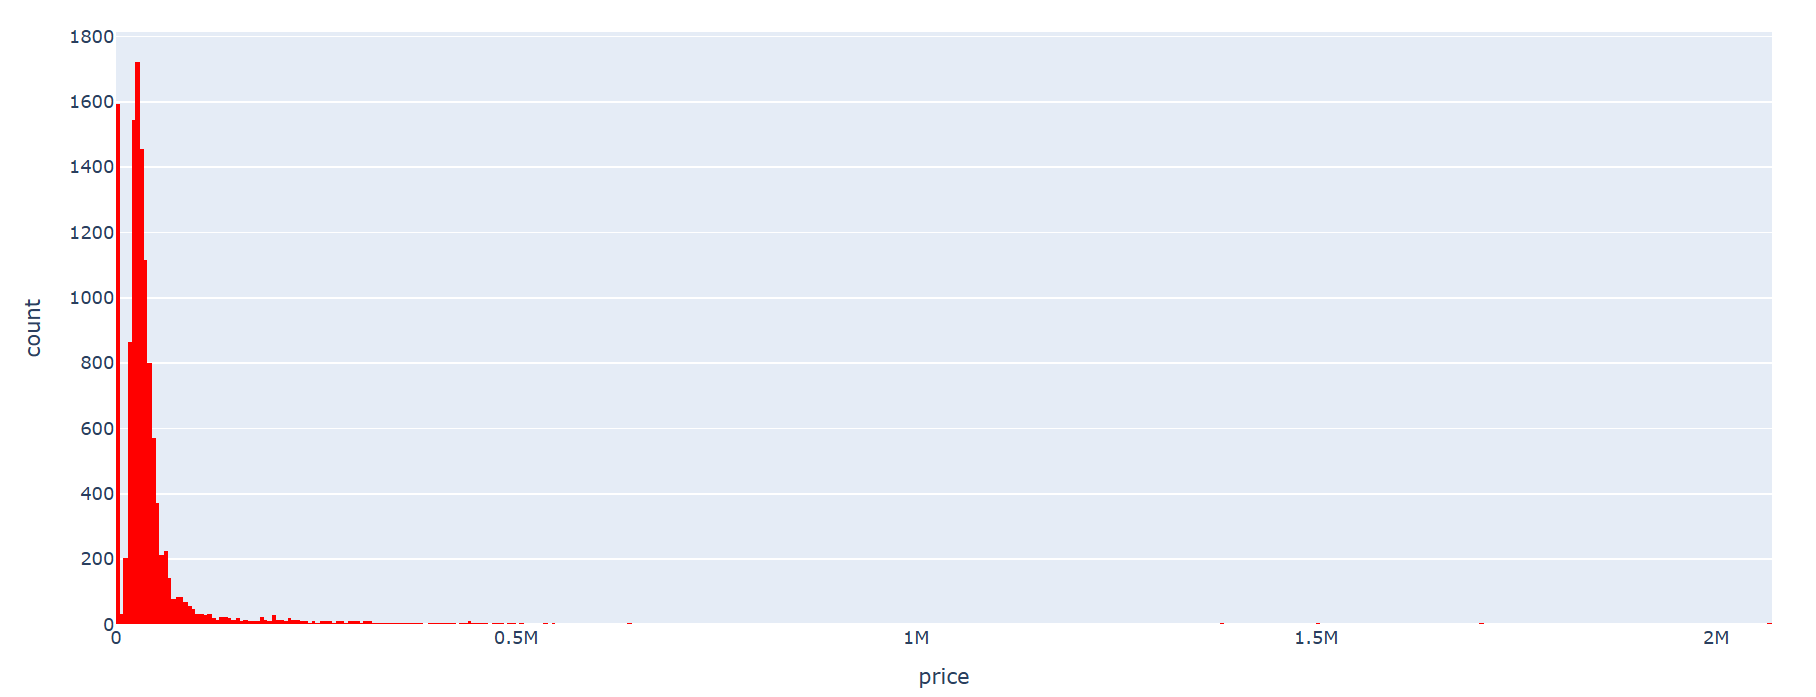

# Concentración en Precios Bajos 

La gráfica muestra una concentración muy marcada de automóviles en los rangos de precios más bajos. Esto indica que la mayoría de los vehículos en tu conjunto de datos son relativamente económicos.

# Pocos Automóviles de Lujo 

A medida que aumentamos el precio, la frecuencia de los automóviles disminuye rápidamente. Esto sugiere que hay pocos vehículos de lujo o alta gama en tu muestra.

# Distribución Asimétrica

La distribución de los precios es claramente asimétrica hacia la derecha. Esto significa que hay una "cola larga" de vehículos con precios muy altos, pero la mayoría de los vehículos están concentrados en la parte inferior del rango de precios.

# Resultados generales

- Marca: Menos recuento: Maserati (2), Máximo recuento: Chevrolet (1039).
- Modelo: Menos recuento: Muchos modelos (1), Máximo recuento: Silverado 1500 (156).
- Año: Menos recuento 1990 (76): , Máximo recuento: 2016 (1756).
- Tipo de combustible: Menos recuento: Gas natural (2), Máximo recuento: Sin plomo regular (6380).
- Hp:: Menos recuento: Muchos hp (1), Máximo recuento: 200 (355).
- Tracción: Menos recuento: Tracción en las cuatro ruedas (1220), Máximo recuento: Tracción delantera (4056).
- Puertas: Menos recuento: 3 (356), Máximo recuento: 4 (7185).
- Tamaño:: Cantidad menor: Grande (2241), Cantidad máxima: Compacto (3822).
- Estilo:: Cantidad menor: SUV convertible (28), Cantidad máxima: Sedán (2448).
- Precio: menor cantidad: muchos precios (1), cantidad máxima: 2000 (736).

# Conclusiones

El análisis del conjunto de datos de automóviles, que incluye variables como marca, modelo, año de fabricación, motor y otras propiedades, revela que el precio de un automóvil está influenciado por múltiples factores tanto técnicos como de mercado. Entre las características más determinantes se encuentra el año de fabricación, ya que existe una relación clara entre la depreciación de los vehículos y su antigüedad, siendo los automóviles más nuevos los que suelen tener un precio más alto. Por otro lado, la marca del vehículo también juega un papel importante: las marcas de lujo, como BMW o Mercedes-Benz, tienden a presentar valores significativamente superiores en comparación con marcas orientadas a segmentos de gama media o económica.

Las especificaciones técnicas, como el tipo de motor, la potencia y la eficiencia del combustible, también impactan directamente en el precio. 

Desde una perspectiva de segmentación, los vehículos económicos mantienen una alta demanda en mercados emergentes, donde el costo es un factor clave de decisión. En contraste, los autos de lujo cuentan con una demanda muy reducida, ya que su mercado principal se encuentra en regiones de mayor poder adquisitivo o de minoria de población, donde factores como el prestigio de la marca y las características premium son esenciales. 

Lo que obtenemos como resultado son factores que, en cierta medida, proporcionan una noción de cuál podría ser el precio de un vehículo, pero no determinan un precio estimado exacto. Entre estos factores, destaca la gran variabilidad de precios según la marca, ya que algunas marcas poseen un prestigio que aumenta significativamente el valor del automóvil. Asimismo, los vehículos antiguos pueden adquirir un valor especial si se convierten en piezas de colección, situación que depende de factores subjetivos como su rareza, estado de conservación, relevancia histórica o demanda en el mercado.

Además, existen valores atípicos o inusuales, como modificaciones personalizadas, participación del vehículo en eventos destacados (por ejemplo, películas o competencias automovilísticas) o ediciones limitadas, los cuales son difíciles de medir debido a su naturaleza única y subjetiva. Estos elementos, aunque no forman parte de las características técnicas estándar, pueden influir considerablemente en el precio final de un automóvil, especialmente en mercados especializados como el de los coleccionistas o los amantes de los autos clásicos.

En conclusión, aunque es posible identificar factores clave que influyen en el precio de un vehículo, estos no siempre son suficientes para proporcionar una estimación exacta, ya que el mercado automotriz también responde a dinámicas complejas y subjetivas que pueden alterar significativamente los valores esperados



In [2]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['make'].unique(), y = cars_data.groupby('make').mean()['hp'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 car brands with highest Hp', xaxis_title = "Car Brand", yaxis_title = "Hp")
fig.show()


NameError: name 'go' is not defined